# EE399 HW4
## Ziwen


https://github.com/ZiwenLi0325/EE399.git

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D
import torch
from torch import nn
from torch.optim import Adam
from scipy import integrate

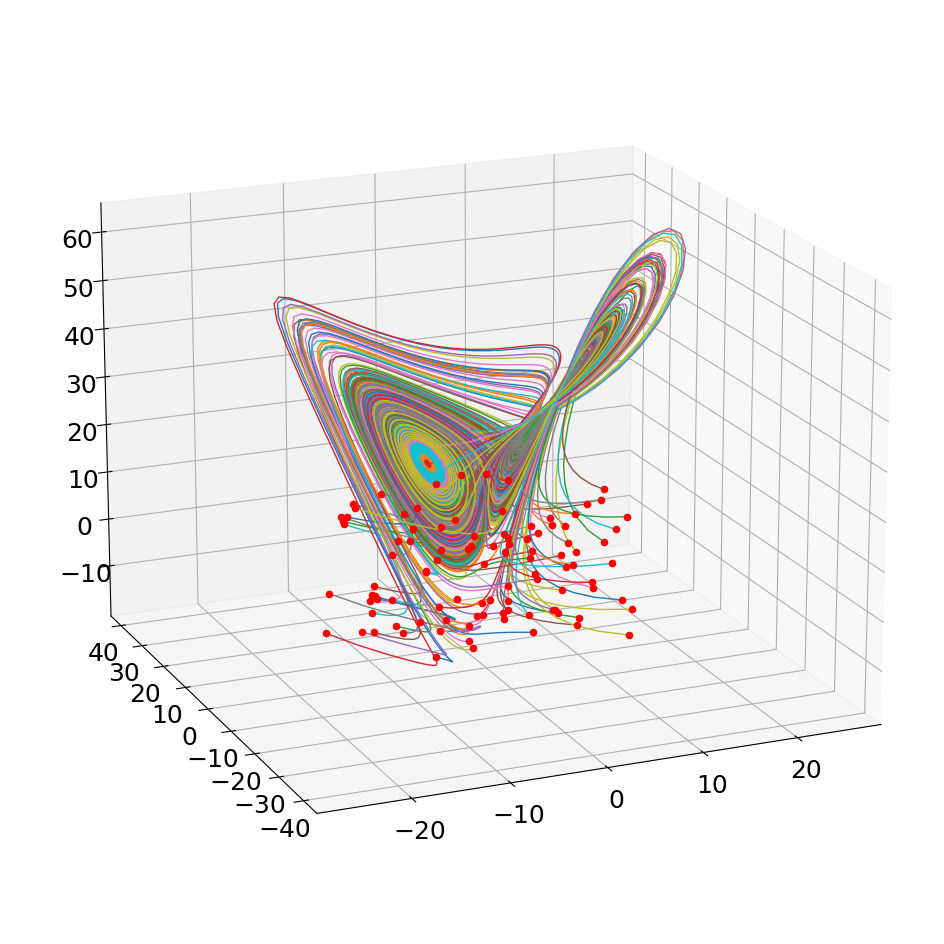

In [2]:
rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

In [5]:
# Define the Lorenz system
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Generate training data for rho=10, 28, 40
rhos = [10, 28, 40]
training_input = []
training_output = []

for rho in rhos:
    np.random.seed(123)
    x0 = -15 + 30 * np.random.random((100, 3))

    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t, args=(sigma, beta, rho)) for x0_j in x0])
    
    for j in range(100):
        training_input.append(x_t[j,:-1,:])
        training_output.append(x_t[j,1:,:])

training_input = np.vstack(training_input)
training_output = np.vstack(training_output)

# Convert numpy arrays to PyTorch tensors
training_input_torch = torch.tensor(training_input, dtype=torch.float32)
training_output_torch = torch.tensor(training_output, dtype=torch.float32)

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3, 50)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Initialize the model and optimizer
model = Net()
optimizer = Adam(model.parameters())

# Define the loss function
criterion = nn.MSELoss()

# Train the network
for epoch in range(100):  # 100 epochs
    optimizer.zero_grad()   # zero the gradient buffers
    output = model(training_input_torch)
    loss = criterion(output, training_output_torch)
    loss.backward()
    optimizer.step()    # Does the update
    if epoch % 10 == 0:
        print('Epoch: {}, Loss: {:.5f}'.format(epoch, loss.item()))

# Now test for rho=17 and 35
rhos = [17, 35]
testing_input = []
testing_output = []

for rho in rhos:
    np.random.seed(123)
    x0 = -15 + 30 * np.random.random((100, 3))

    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t, args=(sigma, beta, rho)) for x0_j in x0])
    
    for j in range(100):
        testing_input.append(x_t[j,:-1,:])
        testing_output.append(x_t[j,1:,:])

testing_input = np.vstack(testing_input)
testing_output = np.vstack(testing_output)

# Convert to PyTorch tensors
testing_input_torch = torch.tensor(testing_input, dtype=torch.float32)
testing_output_torch = torch.tensor(testing_output, dtype=torch.float32)

# Predict future states
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Do not calculate gradients
    predictions = model(testing_input_torch)

# Calculate the loss between the predictions and the true future states
test_loss = criterion(predictions, testing_output_torch)
print('Test loss:', test_loss.item())



Epoch: 0, Loss: 259.88974
Epoch: 10, Loss: 180.66675
Epoch: 20, Loss: 111.21857
Epoch: 30, Loss: 53.94740
Epoch: 40, Loss: 24.10371
Epoch: 50, Loss: 13.73951
Epoch: 60, Loss: 4.42901
Epoch: 70, Loss: 1.71692
Epoch: 80, Loss: 1.25679
Epoch: 90, Loss: 0.73822
Test loss: 0.3952031135559082


## Feed-forward Neural Network

In [1]:
# Define the Lorenz system
def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# Generate training data for rho=10, 28, 40
rhos = [10, 28, 40]
training_input = []
training_output = []

for rho in rhos:
    np.random.seed(123)
    x0 = -15 + 30 * np.random.random((100, 3))

    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t, args=(sigma, beta, rho)) for x0_j in x0])
    
    for j in range(100):
        training_input.append(x_t[j,:-1,:])
        training_output.append(x_t[j,1:,:])

training_input = np.vstack(training_input)
training_output = np.vstack(training_output)

# Convert numpy arrays to PyTorch tensors
training_input_torch = torch.tensor(training_input, dtype=torch.float32)
training_output_torch = torch.tensor(training_output, dtype=torch.float32)

class FeedForwardNN(nn.Module):
    def __init__(self):
        super(FeedForwardNN, self).__init__()
        self.fc1 = nn.Linear(3, 50)  # Input dimension is 3 (for x, y, z)
        self.fc2 = nn.Linear(50, 50)
        self.fc3 = nn.Linear(50, 3)  # Output dimension is 3 (for x, y, z)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)  # No activation function here because the output can be any real number
    
# Initialize the model and optimizer
model = Net()
optimizer = Adam(model.parameters())

# Define the loss function
criterion = nn.MSELoss()

# Train the network
for epoch in range(100):  # 100 epochs
    optimizer.zero_grad()   # zero the gradient buffers
    output = model(training_input_torch)
    loss = criterion(output, training_output_torch)
    loss.backward()
    optimizer.step()    # Does the update
    if epoch % 10 == 0:
        print('Epoch: {}, Loss: {:.5f}'.format(epoch, loss.item()))

# Now test for rho=17 and 35
rhos = [17, 35]
testing_input = []
testing_output = []

for rho in rhos:
    np.random.seed(123)
    x0 = -15 + 30 * np.random.random((100, 3))

    x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t, args=(sigma, beta, rho)) for x0_j in x0])
    
    for j in range(100):
        testing_input.append(x_t[j,:-1,:])
        testing_output.append(x_t[j,1:,:])

testing_input = np.vstack(testing_input)
testing_output = np.vstack(testing_output)

# Convert to PyTorch tensors
testing_input_torch = torch.tensor(testing_input, dtype=torch.float32)
testing_output_torch = torch.tensor(testing_output, dtype=torch.float32)

# Predict future states
model.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Do not calculate gradients
    predictions = model(testing_input_torch)

# Calculate the loss between the predictions and the true future states
test_loss = criterion(predictions, testing_output_torch)
print('Test loss:', test_loss.item())




NameError: name 'FeedForwardNN' is not defined